In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import uuid

In [6]:

# Step 1: Loading and Preprocessing Data
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Project Dataset /users.6M0xxK.2024.public.csv")

In [7]:
df.head()

,identifierHash,type,countryCode,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,...,productsWished,productsBought,gender,civilityGenderId,civilityTitle,hasProfilePicture,seniority,seniorityAsMonths,seniorityAsYears,websiteLongevity
0,1920991140,user,us,Etats-Unis,en,3,8,0,0,0,...,0,0,M,1,mr,True,3206,106.87,8.91,3803
1,1920860068,user,se,Suède,en,3,8,1,0,0,...,0,0,M,1,mr,True,3206,106.87,8.91,3803
2,1920401316,user,it,Italie,fr,3,8,0,0,0,...,0,0,M,1,mr,True,3206,106.87,8.91,3803
3,1919811492,user,dk,Danemark,en,75,10,1968,0,0,...,43,15,M,1,mr,True,3206,106.87,8.91,3803
4,1919025060,user,de,Allemagne,de,3,8,0,0,0,...,0,0,M,1,mr,True,3206,106.87,8.91,3803


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20743 entries, 0 to 20742
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       20743 non-null  int64  
 1   type                 20743 non-null  object 
 2   countryCode          20710 non-null  object 
 3   country              20743 non-null  object 
 4   language             20743 non-null  object 
 5   socialNbFollowers    20743 non-null  int64  
 6   socialNbFollows      20743 non-null  int64  
 7   socialProductsLiked  20743 non-null  int64  
 8   productsListed       20743 non-null  int64  
 9   productsSold         20743 non-null  int64  
 10  productsPassRate     20743 non-null  float64
 11  productsWished       20743 non-null  int64  
 12  productsBought       20743 non-null  int64  
 13  gender               20743 non-null  object 
 14  civilityGenderId     20743 non-null  int64  
 15  civilityTitle        20743 non-null 

In [9]:
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,seniority,seniorityAsMonths,seniorityAsYears,websiteLongevity
count,2.074300e+04,20743.000000,20743.000000,20743.000000,20743.000000,20743.00000,20743.000000,20743.000000,20743.000000,20743.0,20743.000000,20743.000000,20743.00000,20743.0
mean,1.891011e+09,11.326231,15.645712,51.862363,0.622813,2.13431,8.487630,15.045172,2.722894,1.0,3066.299089,102.209844,8.51741,3803.0
std,1.281870e+09,56.131341,512.351535,573.693078,9.117789,15.50530,26.027697,130.633642,23.967183,0.0,168.012782,5.600623,0.46706,0.0
min,3.275870e+05,3.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,2853.000000,95.100000,7.92000,3803.0
25%,8.160869e+08,3.000000,8.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,2858.000000,95.270000,7.94000,3803.0
50%,1.620902e+09,3.000000,8.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0,3198.000000,106.600000,8.88000,3803.0
75%,2.975891e+09,7.000000,8.000000,16.000000,0.000000,0.00000,0.000000,2.000000,1.000000,1.0,3202.000000,106.730000,8.89000,3803.0
max,4.294836e+09,4134.000000,71045.000000,64267.000000,868.000000,843.00000,100.000000,6241.000000,2679.000000,1.0,3206.000000,106.870000,8.91000,3803.0


In [11]:
df.shape

(20743, 21)

In [10]:
df.isnull().sum()

,0
identifierHash,0
type,0
countryCode,33
country,0
language,0
socialNbFollowers,0
socialNbFollows,0
socialProductsLiked,0
productsListed,0
productsSold,0


In [12]:
df['countryCode'] = df['countryCode'].fillna('Unknown')


In [13]:
# Step 2: Outlier Detection and Handling
# Create RFM and social engagement features
rfm_df = df[['identifierHash']].copy()
rfm_df['recency'] = df['seniority']  # Assuming seniority as proxy for recency (days since last activity)
rfm_df['frequency'] = df['productsBought']
rfm_df['monetary'] = df['productsBought']  # Proxy for monetary value
rfm_df['social_nb_followers'] = df['socialNbFollowers']
rfm_df['products_wished'] = df['productsWished']
rfm_df['social_products_liked'] = df['socialProductsLiked']


In [14]:
# Cap extreme social_products_liked values
rfm_df['social_products_liked'] = rfm_df['social_products_liked'].clip(upper=rfm_df['social_products_liked'].quantile(0.99))

In [15]:
# Remove outliers using z-scores
z_scores = stats.zscore(rfm_df[['recency', 'frequency', 'monetary', 'social_nb_followers', 'products_wished', 'social_products_liked']])
rfm_df = rfm_df[(abs(z_scores) < 3).all(axis=1)]

In [16]:
# Step 3: Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_df[['recency', 'frequency', 'monetary', 'social_nb_followers', 'products_wished', 'social_products_liked']])


In [17]:
# Step 4: Determine Optimal Number of Clusters
inertias = []
silhouette_scores = []
K = range(2, 8)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

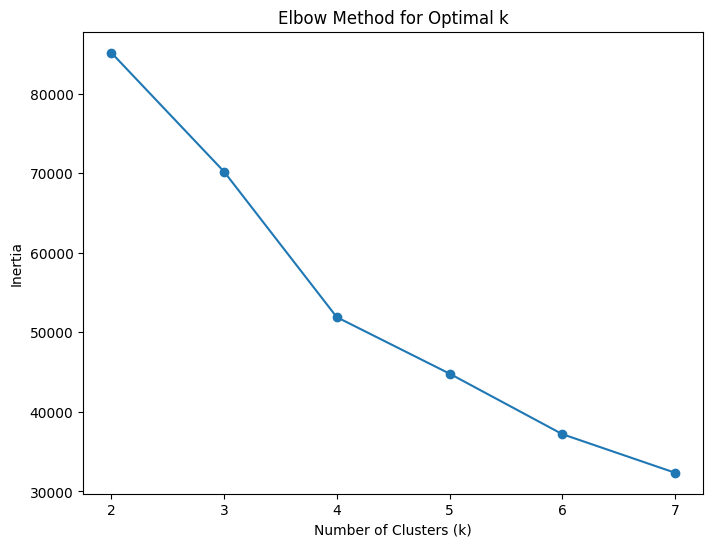

In [18]:
# Plot elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig('elbow_curve.png')

In [21]:

# Step 5: Apply KMeans Clustering
# Based on the elbow plot, assume optimal_k is 4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(scaled_features)


In [22]:
# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, rfm_df['cluster'])
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg:.3f}")

Silhouette Score for 4 clusters: 0.625


In [23]:
# Step 6: Cluster Summary
cluster_summary_original = rfm_df.groupby('cluster').mean()
cluster_counts = rfm_df['cluster'].value_counts().sort_index()

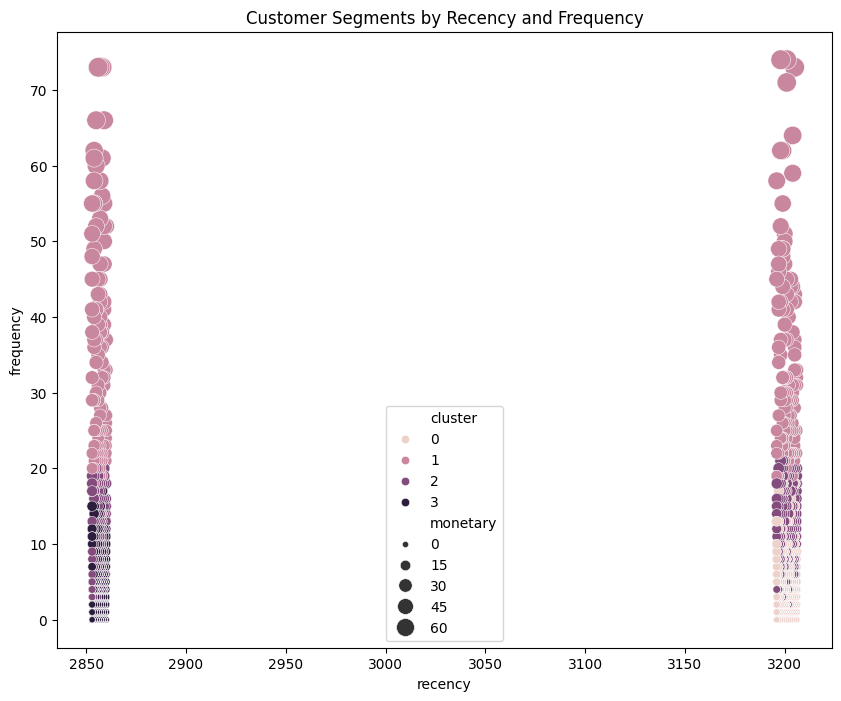

In [24]:
# Step 7: Visualize Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=rfm_df, x='recency', y='frequency', hue='cluster', size='monetary', sizes=(20, 200))
plt.title('Customer Segments by Recency and Frequency')
plt.savefig('cluster_scatter.png')

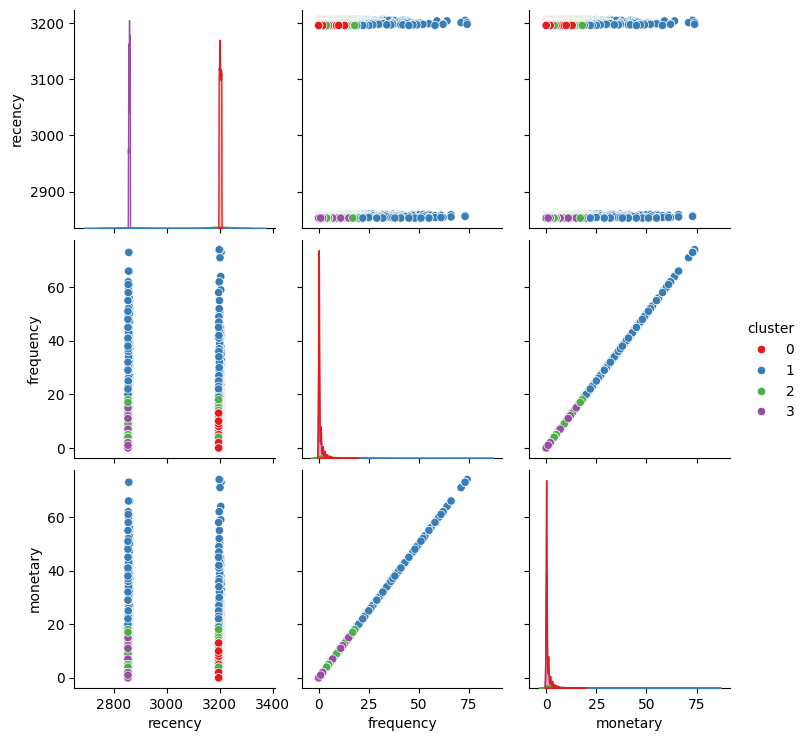

In [25]:
# Step 6: Visualizing Clusters
# Plotting pairplot for key RFM features
sns.pairplot(rfm_df, vars=['recency', 'frequency', 'monetary'], hue='cluster',
             palette='Set1', diag_kind='kde')
plt.savefig('rfm_pairplot.png')

In [27]:
# Step 8: Generate Marketing Summary
marketing_summary = [
    "Customer Segmentation Marketing Summary\n",
    "======================================\n",
    f"Date: {pd.Timestamp.now().strftime('%Y-%m-%d')}\n\n",
    f"Total Customers: {len(rfm_df)}\n",
    f"Number of Clusters: {optimal_k}\n",
    f"Silhouette Score: {silhouette_avg:.3f}\n\n"
]

# Add cluster details and marketing recommendations
for cluster in range(optimal_k):
    marketing_summary.append(f"Cluster {cluster} (Size: {cluster_counts[cluster]} customers)\n")
    marketing_summary.append("----------------------------------------\n")

    # Cluster characteristics
    summary = cluster_summary_original.loc[cluster]
    marketing_summary.append("Characteristics:\n")
    marketing_summary.append(f"- Avg Recency: {summary['recency']:.2f} days since activity\n")
    marketing_summary.append(f"- Avg Frequency: {summary['frequency']:.2f} products bought\n")
    marketing_summary.append(f"- Avg Monetary: {summary['monetary']:.2f} (proxy: products bought)\n")
    marketing_summary.append(f"- Avg Social Followers: {summary['social_nb_followers']:.2f}\n")
    marketing_summary.append(f"- Avg Products Wished: {summary['products_wished']:.2f}\n")
    marketing_summary.append(f"- Avg Social Products Liked: {summary['social_products_liked']:.2f}\n")

    # Marketing recommendations
    marketing_summary.append("\nMarketing Strategies:\n")
     # Recency-based strategies
    if summary['recency'] > cluster_summary_original['recency'].mean():
        marketing_summary.append("- Inactive Customers: Launch re-engagement campaigns with personalized discounts or reminders.\n")
    else:
        marketing_summary.append("- Active Customers: Maintain personalized offers to maintain engagement.\n")

    # Frequency-based strategies
    if summary['frequency'] > cluster_summary_original['frequency'].mean():
        marketing_summary.append("- High-Frequency Buyers: Offer loyalty rewards, VIP programs, or exclusive deals.\n")
    else:
        marketing_summary.append("- Low-Frequency Buyers: Encourage repeat purchases with bundled offers or subscription models.\n")
            # Monetary-based strategies
    if summary['monetary'] > cluster_summary_original['monetary'].mean():
        marketing_summary.append("- High-Value Customers: Provide premium services or early access to new products.\n")
    else:
        marketing_summary.append("- Low-Value Customers: Promote affordable product lines or entry-level offers.\n")

 # Social engagement strategies
    if summary['social_nb_followers'] > cluster_summary_original['social_nb_followers'].mean():
        marketing_summary.append("- Socially Influential: Target with influencer campaigns or referral programs.\n")

    if summary['social_products_liked'] > cluster_summary_original['social_products_liked'].mean():
        marketing_summary.append("- High Product Engagement: Promote trending or popular products via social media.\n")

    if summary['products_wished'] > cluster_summary_original['products_wished'].mean():
        marketing_summary.append("- High Wish-List Activity: Send personalized product recommendations or wish-list reminders.\n")

    marketing_summary.append("\n")





In [29]:
# Step 9: Save Outputs
try:
    with open('marketing_summary.txt', 'w') as f:
        f.writelines(marketing_summary)
except IOError as e:
    print(f"Error saving marketing summary: {e}")

try:
    rfm_df.to_csv('segmented_customers.csv', index=False)
except IOError as e:
    print(f"Error saving segmented customers: {e}")


In [30]:

# Step 10: Print Marketing Summary
print("Marketing Summary:\n", ''.join(marketing_summary))

Marketing Summary:
 Customer Segmentation Marketing Summary
Date: 2025-06-02

Total Customers: 20057
Number of Clusters: 4
Silhouette Score: 0.625

Cluster 0 (Size: 11209 customers)
----------------------------------------
Characteristics:
- Avg Recency: 3200.94 days since activity
- Avg Frequency: 0.57 products bought
- Avg Monetary: 0.57 (proxy: products bought)
- Avg Social Followers: 5.37
- Avg Products Wished: 1.98
- Avg Social Products Liked: 9.17

Marketing Strategies:
- Inactive Customers: Launch re-engagement campaigns with personalized discounts or reminders.
- Low-Frequency Buyers: Encourage repeat purchases with bundled offers or subscription models.
- Low-Value Customers: Promote affordable product lines or entry-level offers.

Cluster 1 (Size: 266 customers)
----------------------------------------
Characteristics:
- Avg Recency: 3050.77 days since activity
- Avg Frequency: 33.73 products bought
- Avg Monetary: 33.73 (proxy: products bought)
- Avg Social Followers: 32.05
